In [645]:
print("Source Energy Accounts for Total Energy Use")
features_to_predict = [
    "SourceEUI(kBtu/sf)",
"SiteEnergyUse(kBtu)",
"SteamUse(kBtu)",
"Electricity(kBtu)",
"NaturalGas(kBtu)",
"TotalGHGEmissions"]

print("Features to predict : ", features_to_predict)

Source Energy Accounts for Total Energy Use
Features to predict :  ['SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions']


In [643]:
#dataset = pd.read_csv("dataset/2016_Building_Energy_Cleaned.csv")

# matrice corr
# distribution


# nettoyer : filtrer en ligne / quelques graphiques pour la presentation et mieux visualier / pour justifier des filtres

# exploration : features et var à prédire / matrice de corr / gtaphiques de distribution (var categorielles)

# à la fin du premier notebook / csv : bat propres et colonnes pour prediction

# 1) notebook par var à predire (tres propres et exaustif) : MAX TEMPS
# 2) dupliquer

# 1 modele de Regression (RL classsque / Elastic / ridig / laso
# Random Forest
# XGBOOST

# var à rpedire tottal GHE Emssion last one to predict
# cette var deped de la consommation des bateimenst (1) prediction sur elec, steam, naturalgas et un autre energie (2) et reutiliser pour predire



### Importing libraries

In [1]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


# PART 2 : Exploration of the dataset

In [1]:
dataset_path = "dataset/2016_Building_Energy_Cleaned.csv"
data = pd.read_csv(dataset_path)

NameError: name 'pd' is not defined

In [3]:
data.shape

(3376, 46)

In [4]:
data[:10]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.984380,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7371434.0,47151.816410,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,...,8.239199e+05,2811215.0,29475.800780,2947580.0,False,NaN,Compliant,NaN,176.14,2.12
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,...,1.065843e+06,3636655.0,3851.890137,385189.0,False,NaN,Compliant,NaN,221.51,2.16
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.0,0939000080,...,2.138898e+06,7297919.0,64259.000000,6425900.0,False,NaN,Compliant,NaN,392.16,2.39
9,13,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon Building,607 - 3rd Ave.,Seattle,WA,98104.0,0939000105,...,7.420912e+05,2532015.0,10020.259770,1002026.0,False,NaN,Compliant,NaN,151.12,2.37


### 1) Plot kWh / kBtu and therms / kBtu

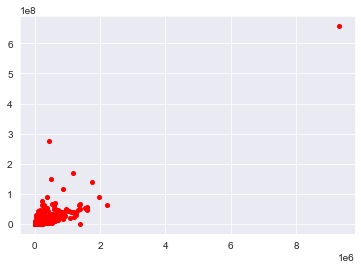

In [5]:
# propertyTotalGFA as a function of Electricity
plt.plot(data["PropertyGFATotal"], data["Electricity(kBtu)"], "ro", markersize=4)
plt.show()

<AxesSubplot:xlabel='NaturalGas(therms)', ylabel='NaturalGas(kBtu)'>

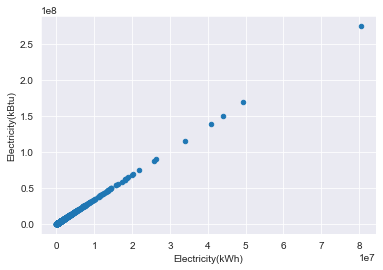

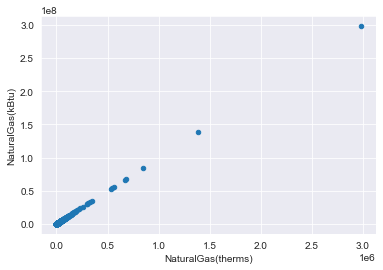

In [641]:
data = dataset.copy()
#data.plot.scatter("Electricity(kWh)", "Electricity(kBtu)", c="CouncilDistrictCode", colormap='viridis')
#data.plot.scatter("NaturalGas(therms)", "NaturalGas(kBtu)", c="CouncilDistrictCode", colormap='viridis')

data.plot.scatter("Electricity(kWh)", "Electricity(kBtu)")
data.plot.scatter("NaturalGas(therms)", "NaturalGas(kBtu)")

In [642]:
print("After checking that the Electricity in kWh = 3.412 Electricity in kBtu and that NaturalGas(therms) = 100 NaturalGas(kBtu) ; we drop the kWh and therms.")
dataset_v1 = data.drop(columns=["Electricity(kWh)", "NaturalGas(therms)"])

After checking that the Electricity in kWh = 3.412 Electricity in kBtu and that NaturalGas(therms) = 100 NaturalGas(kBtu) ; we drop the kWh and therms.


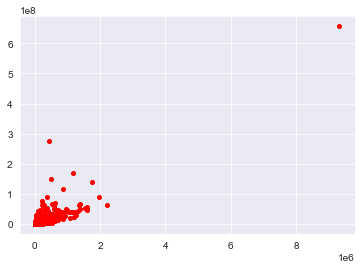

In [6]:
# remove outliers : Elctricity > 1 million

data = data[(data["Electricity(kBtu)"] > 0) & (data["PropertyGFATotal"] > 0) & (data["Electricity(kWh)"] > 0)]

plt.plot(data["PropertyGFATotal"], data["Electricity(kBtu)"], "ro", markersize=4)
plt.show()

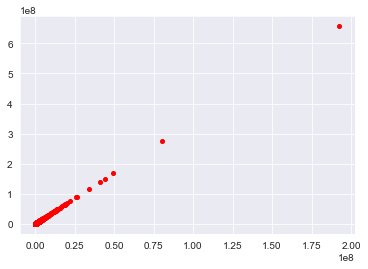

In [7]:
# Easy Linear Regression : x = kWh y = kBtu
plt.plot(data["Electricity(kWh)"], data["Electricity(kBtu)"], "ro", markersize=4)
plt.show()

### Manual Linear Regression

In [8]:
# Linear Regression "manually" / we transform the dataset into matrices to compute theta
X = np.matrix([np.ones(data.shape[0]), data["Electricity(kWh)"]]).T
Y = np.matrix(data["Electricity(kBtu)"]).T

In [9]:
np.set_printoptions(suppress=True) # remove scientific notation
X[:10]

matrix([[       1.    ,  1156514.25  ],
        [       1.    ,   950425.1875],
        [       1.    , 14515435.    ],
        [       1.    ,   811525.3125],
        [       1.    ,  1573448.625 ],
        [       1.    ,  2160443.75  ],
        [       1.    ,   823919.875 ],
        [       1.    ,  1065842.75  ],
        [       1.    ,  2138897.75  ],
        [       1.    ,   742091.1875]])

In [10]:
# Computing the exact value of the parameter theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# displaying theta with a = slope ; and b = y-intercept
print(theta)

# we test Y = aX + b for X = 10
print(theta.item(0) + theta.item(1) * 10)

[[0.00993694]
 [3.412     ]]
34.1299369180409


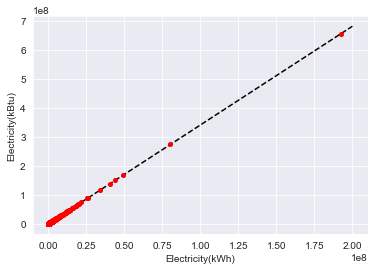

In [11]:
plt.xlabel("Electricity(kWh)")
plt.ylabel("Electricity(kBtu)")

x_min = 0
x_max = 200000000
y_min = theta.item(0)
y_max = theta.item(0) + x_max * theta.item(1)

plt.plot([x_min, x_max], [y_min, y_max], linestyle="--", c="#000000")
plt.plot(data["Electricity(kWh)"], data["Electricity(kBtu)"], "ro", markersize=4)

plt.show()

### Automatic Linear Regression

In [12]:
# 0) Getting data and Sampling
from sklearn.linear_model import LinearRegression

X = data["Electricity(kWh)"]
y = data["Electricity(kBtu)"] # target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# reshape to get 2D array instead of 1D array.
# values to get a numpy array instead of a pandas Series
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [13]:
# 1) Training Linear Regression and Evaluating
reg = LinearRegression().fit(X_train, y_train)
prediction_score = reg.score(X_test, y_test)
print("Accuracy is : ", prediction_score)

# 2) Trying to predict a value
reg.predict([[10]]) # if X = 10 kWh then Y = 34.12 kBtu ;)

Accuracy is :  0.9999999999999991


array([[34.12880736]])

### 2) Correlation Matrix

In [644]:
# exploration : matrice corrélation et corrélation entre categorielles et quantitatives (GHGE corrélé avec var consom E (elctricity, steam etc)
# predict : consomation bat puis avec ca predire l'emission CO2
# 1) prediction consommation sur l'énergie puis predire CO2 (le + long le +complexe)
# categories batiments mal ecrites / numeriques incohérentes